##### Import statements

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

##### Download VADER lexicon

In [2]:
nltk.download( "vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amrka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

##### Loading textual dataset

In [3]:
df = pd.read_csv( "data/result/clean-data.csv", sep=";")

##### Calculate polarity score

In [4]:
sia = SentimentIntensityAnalyzer()

sentiment_score = [ sia.polarity_scores( t) for t in df[ "text"]]

##### Add scores to dataframe

In [5]:
neg = []
neu = []
pos = []
compound = []

for score in sentiment_score:
	neg.append( score[ "neg"])
	neu.append( score[ "neu"])
	pos.append( score[ "pos"])
	compound.append( score[ "compound"])

df[ "neg"] = neg
df[ "neu"] = neu
df[ "pos"] = pos
df[ "compound"] = compound

##### Sentiment scores of first five samples

In [6]:
for i in range( 5):
	row = df.iloc[ i]
	print( f"Text: { row[ 'text']}")
	print( f"neg: { row[ 'neg']}, neu: { row[ 'neu']}, pos: { row[ 'pos']}, compound: { row[ 'compound']}")

Text: What’s Next For Southwest Stock After A 20% Rise This Year?, Southwest Airlines (NYSE: LUV) reported its Q4 results earlier this year, with revenues and earnings above the street estimates.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0
Text: Another Strong Jobs Number But A Smaller Number Of Stocks Leading The Rally, Heading into the jobs report, estimates called for 190 thousand new jobs created and an unemployment rate of 3.7%.
neg: 0.104, neu: 0.701, pos: 0.195, compound: 0.1027
Text: One Size Does NOT Fit All - Talking To Women About Wealth Management, Women have known for years – one size does not fit all Heck, one size doesn't even fit most. Wealth management industry needs a new approach to serving and recruiting women!
neg: 0.129, neu: 0.734, pos: 0.137, compound: 0.3318
Text: Should You Pick CVS Stock At $75 After A 6% Fall This Year?, CVS Health (NYSE: CVS) reported its Q4 results last month, with revenues and earnings beating the street estimates.
neg: 0.094, neu: 0.906,

##### Histogram of compound sentiment score of all samples

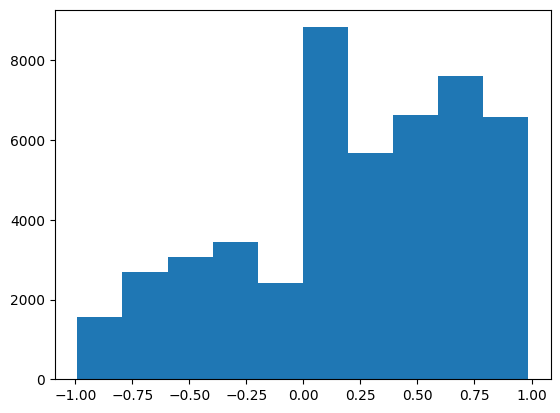

In [7]:
plt.figure()
plt.hist( compound, bins=10)
plt.show()

##### Saving result

In [8]:
df.to_csv( "data/result/clean-data-with-sentiment.csv", sep=";", index=False)